# Stats Models

# HP Filter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Amir\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\macrodata.csv', index_col=0, parse_dates=True)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
1960-06-30,1960,2,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
1960-09-30,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
1960-12-31,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
1961-03-31,1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
1961-06-30,1961,2,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


<AxesSubplot:>

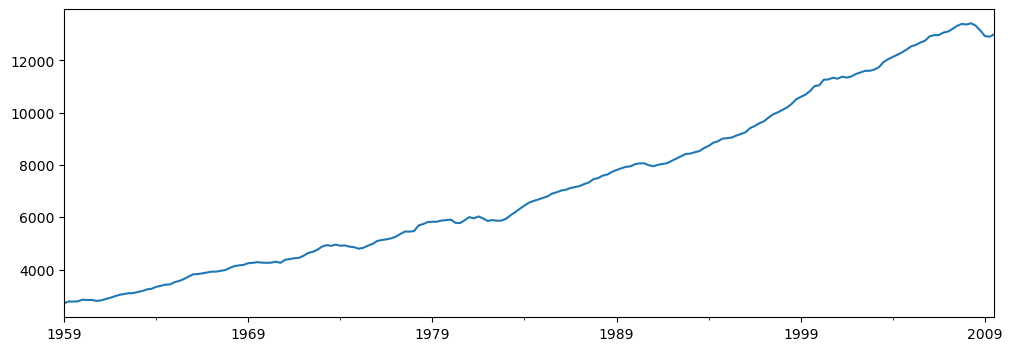

In [4]:
df['realgdp'].plot(figsize=(12,4))

In [5]:
# importing statsmodels
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
# pulling trend & cycle. we use lamb=1600 since this is quarterly data

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [7]:
df['trend'] = gdp_trend

<AxesSubplot:>

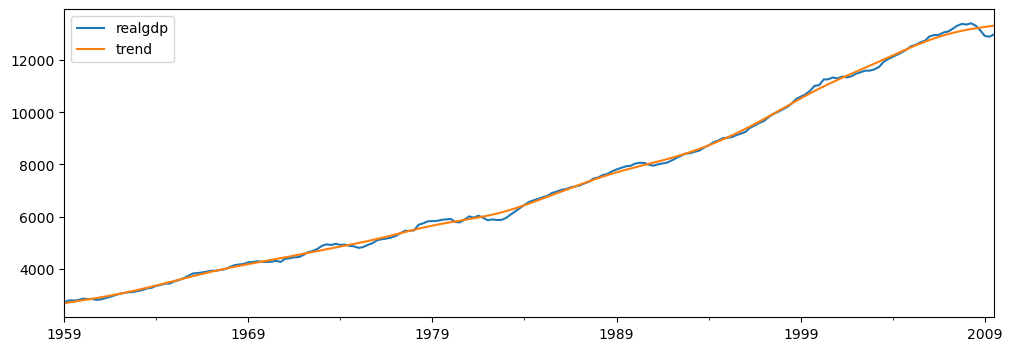

In [8]:
df[['realgdp','trend']].plot(figsize=(12,4))

<AxesSubplot:>

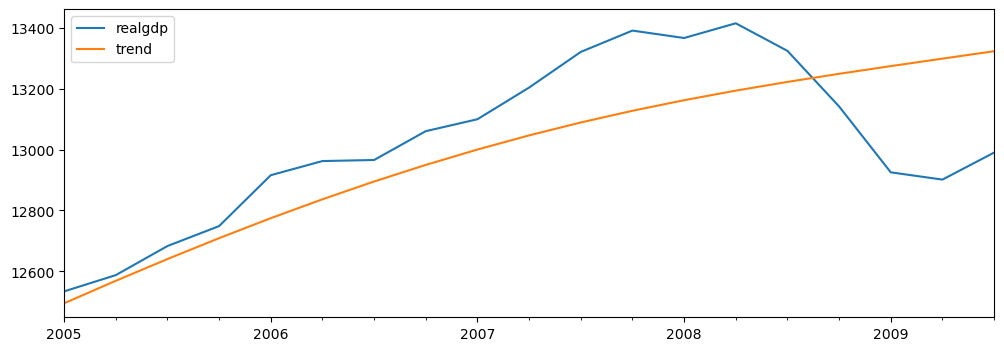

In [9]:
# check the trend during recesseion 

df[['realgdp','trend']]['2005-02-01':].plot(figsize=(12,4))

# ETS Decomposition

In [10]:
airline = pd.read_csv(r'C:\Amir\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col='Month', parse_dates = True)

In [11]:
airline.columns

Index(['Thousands of Passengers'], dtype='object')

In [12]:
airline.dropna(inplace=True)

<AxesSubplot:xlabel='Month'>

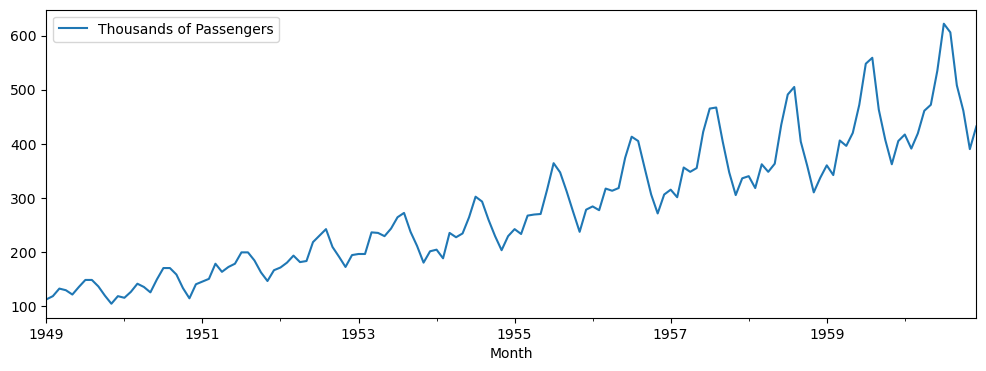

In [13]:
airline.plot(figsize=(12,4))

In [14]:
# since the trend is increasing slightly higher rate than linear, we use multipicative model

In [15]:
# importing library
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multipicative')

In [17]:
trends = result.trend

In [18]:
airline['trend'] = trends

<AxesSubplot:xlabel='Month'>

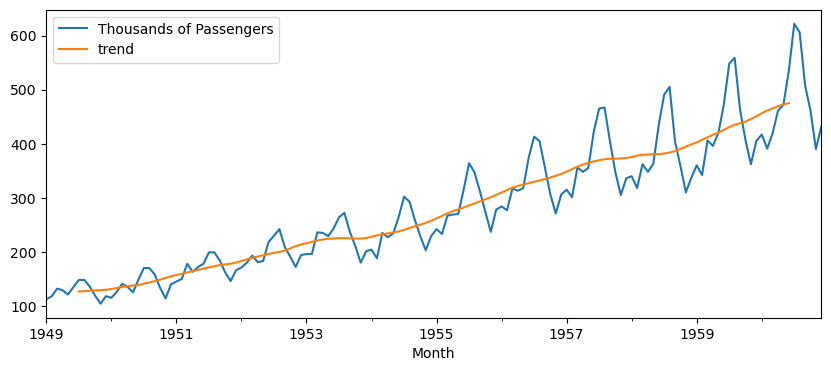

In [19]:
#plotting trend along with actual data
airline.plot(figsize=(10,4))

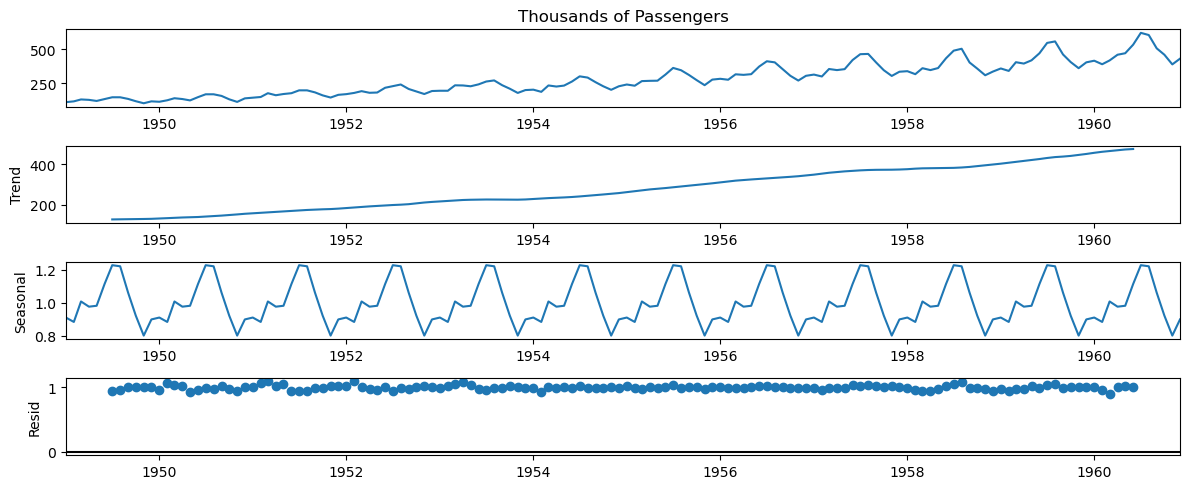

In [20]:
# plotting results

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

# SMA vs EWMA

In [21]:
# creating 6-months and 12-months moving averages

airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [22]:
airline.head(20)

,Thousands of Passengers,trend,6-month-SMA,12-month-SMA
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN
1949-06-01,135,NaN,124.500000,NaN
1949-07-01,148,126.791667,130.500000,NaN
1949-08-01,148,127.250000,135.500000,NaN
1949-09-01,136,127.958333,136.166667,NaN


<AxesSubplot:xlabel='Month'>

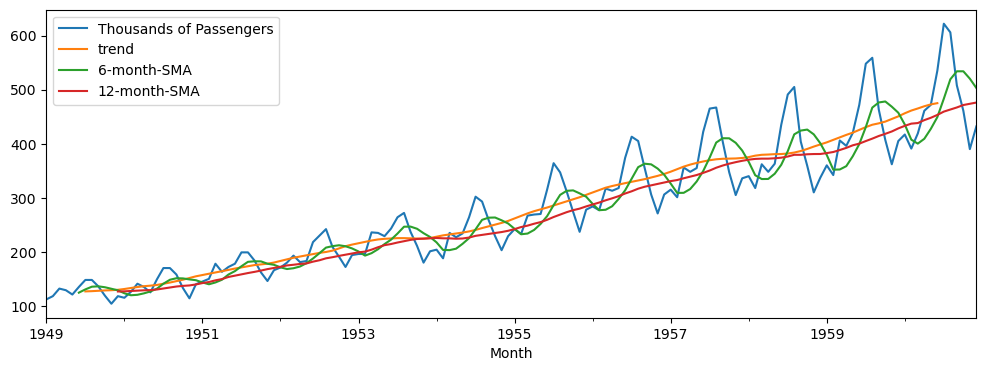

In [23]:
airline.plot(figsize=(12,4))

In [24]:
# creating ewma columns

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

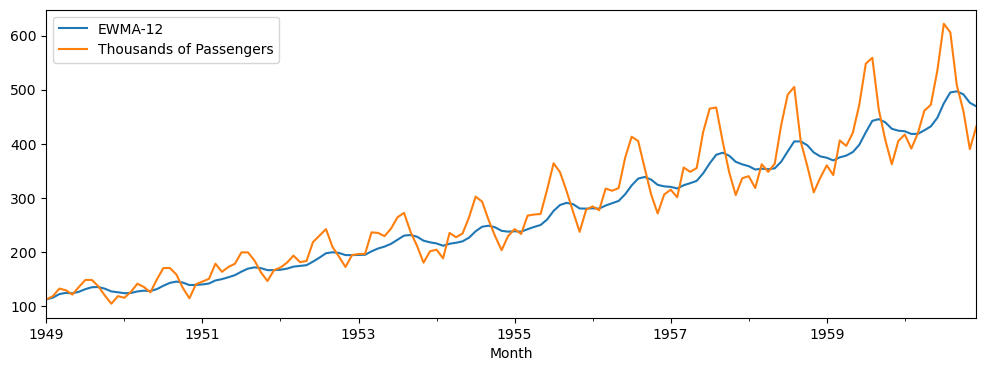

In [25]:
# plot the EWMA-12 along with raw data

airline[['EWMA-12','Thousands of Passengers']].plot(figsize=(12,4))

In [26]:
# as we can see, the seasonality trend is more clear towards the end since the model is weighted 

# Holt-Winters Method 

In [27]:
df = pd.read_csv(r'C:\Amir\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\airline_passengers.csv', index_col='Month', parse_dates=True)

In [28]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [29]:
df.isna().sum()

Thousands of Passengers    0
dtype: int64

In [30]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [31]:
# we need to update the frequency so the model can read it automatically 

In [48]:
df.index.freq = 'MS'

# Simple Exponential Smoothing

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_mul_12
Month,,,,
1949-01-01,112,112.000000,112.000000,113.990701
1949-02-01,118,112.923077,112.923077,120.031669
1949-03-01,132,115.857988,115.857988,134.235979
1949-04-01,129,117.879836,117.879836,131.270786
1949-05-01,121,118.359861,118.359861,123.156267


# Double Exponential Smoothing

In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_mul_12,DESadd12
Month,,,,,
1949-01-01,112,112.000000,112.000000,113.990701,114.102394
1949-02-01,118,112.923077,112.923077,120.031669,120.040657
1949-03-01,132,115.857988,115.857988,134.235979,134.001539
1949-04-01,129,117.879836,117.879836,131.270786,131.085845
1949-05-01,121,118.359861,118.359861,123.156267,123.110263


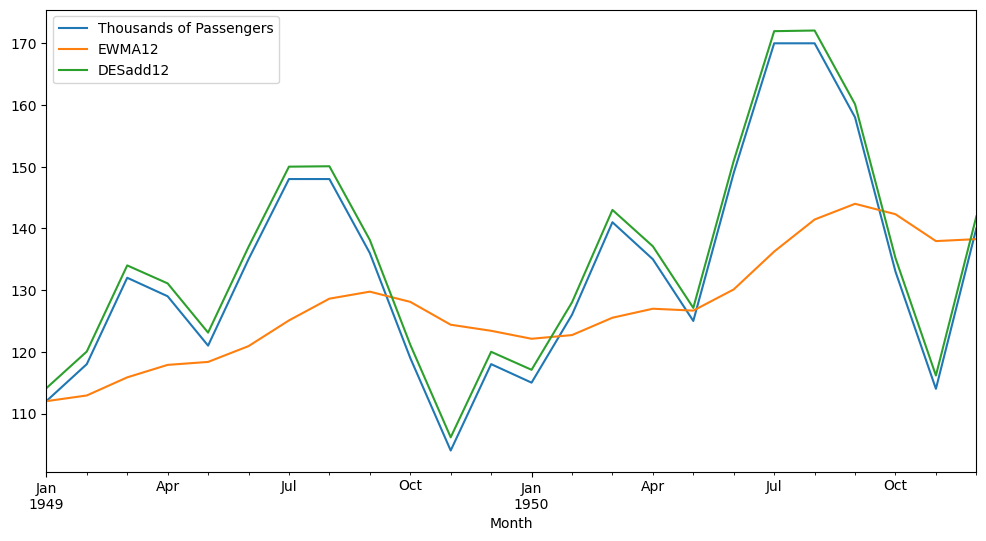

In [50]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
Let's see if using a multiplicative seasonal adjustment helps.

In [53]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_mul_12,DESadd12,DESmul12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,113.990701,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.031669,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.235979,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.270786,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.156267,123.110263,123.156267


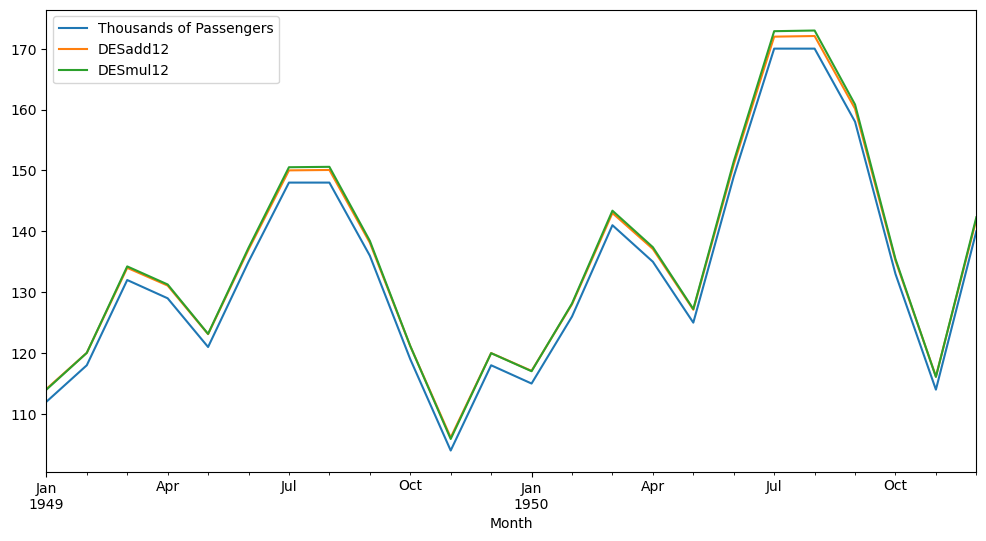

In [54]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.

# Triple Exponential Smoothing

In [56]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_mul_12,DESadd12,DESmul12,TESadd12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,113.990701,114.102394,113.990701,111.986872
1949-02-01,118,112.923077,112.923077,120.031669,120.040657,120.031669,120.138781
1949-03-01,132,115.857988,115.857988,134.235979,134.001539,134.235979,134.669157
1949-04-01,129,117.879836,117.879836,131.270786,131.085845,131.270786,131.379385
1949-05-01,121,118.359861,118.359861,123.156267,123.110263,123.156267,124.627330


In [57]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\axm40hi\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EWMA12,SES12,DES_mul_12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,,
1949-01-01,112,112.000000,112.000000,113.990701,114.102394,113.990701,111.986872,111.590815
1949-02-01,118,112.923077,112.923077,120.031669,120.040657,120.031669,120.138781,118.842908
1949-03-01,132,115.857988,115.857988,134.235979,134.001539,134.235979,134.669157,133.330735
1949-04-01,129,117.879836,117.879836,131.270786,131.085845,131.270786,131.379385,127.897958
1949-05-01,121,118.359861,118.359861,123.156267,123.110263,123.156267,124.627330,120.982190


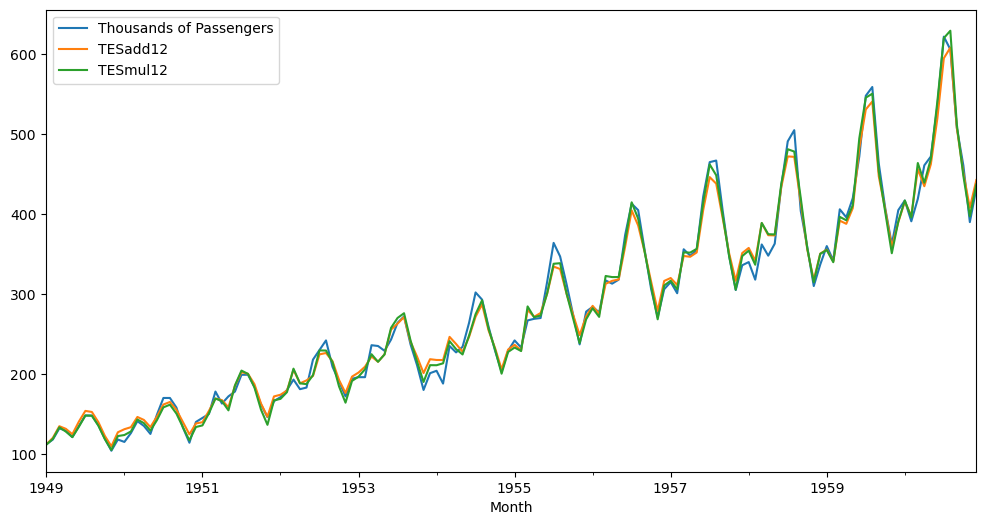

In [58]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

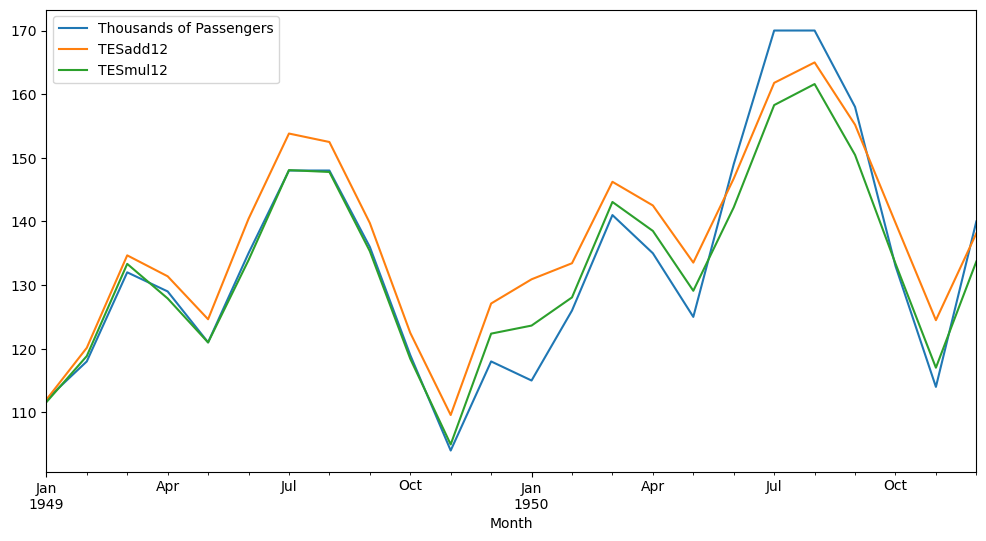

In [59]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - forecasting. We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

But first, we'll work out some time series exercises before moving on to forecasting.

In [60]:
pwd

'C:\\Users\\axm40hi\\Practice\\UDEMY_TSA_FINAL\\05-Time-Series-Analysis-with-Statsmodels'